# Exploration <a id="title"></a>
Here we perform some basic exploration of the wikibooks dataset in order to get basic insights and get some ideas on how to
process the data for training the model.

## Contents
- [Wikibooks Dataset](#wikibooks-dataset)
  - [Data Loading](#data-loading)
  - [Text Exploration](#text-exploration)
- [TED Dataset](#ted-dataset)
  - [Data Loading](#data-loading-ted)
  - [Exploration](#exploration-ted)

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

## Wikibooks Dataset <a id="wikibooks-dataset"></a>

### Data Loading <a id="data-loading"></a>

In [2]:
fr_file = os.path.join("..", "data", "raw-data", "french-wikibooks", "fr-books-dataset.csv")
df_fr = pd.read_csv(fr_file)

print(df_fr.shape)
print(df_fr.columns)

df_fr.head()

(19080, 5)
Index(['title', 'url', 'abstract', 'body_text', 'body_html'], dtype='object')


,title,url,abstract,body_text,body_html
0,Wikilivres : Photographie/Personnalités/B/Joha...,https://fr.wikibooks.org/wiki/Photographie/Per...,Johan Emilius Bøgh était un photographe danois...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4..."
1,Wikilivres : Photographie/Sociétés et Organisa...,https://fr.wikibooks.org/wiki/Photographie/Soc...,Hugerot-Gallimard était un éditeur de cartes f...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4..."
2,Wikilivres : Pouvoir Accéder et Utiliser Write...,https://fr.wikibooks.org/wiki/Pouvoir_Acc%C3%A...,== Ouvrir la fenêtre d'aide de Writer ==,Pouvoir Accéder et Utiliser Writer\n\n\nBienve...,"<div class=""mw-parser-output""><p><br>\n</p>\n<..."
3,Wikilivres : Climat et écocitoyens/Plantons le...,https://fr.wikibooks.org/wiki/Climat_et_%C3%A9...,==Construire son paysage==,Climat et écocitoyens\n\n\nPlan\n\n\n\nAvant-p...,"<div class=""mw-parser-output""><table class=""no..."
4,Wikilivres : Programmation Bash/Commandes shell,https://fr.wikibooks.org/wiki/Programmation_Ba...,"Une commande, dans le sens plus général, est u...",Programmation Bash\n\n\nIntroduction\nHello Wo...,"<div class=""mw-parser-output""><p><br>\n</p>\n<..."


In [3]:
pd.isnull(df_fr).sum()

title          0
url            0
abstract     356
body_text     15
body_html      0
dtype: int64

As we can see, there are very few book entries with no body or abstract, so we can safely discard them.

In [4]:
df_fr.dropna(inplace=True)
pd.isnull(df_fr).sum()

title        0
url          0
abstract     0
body_text    0
body_html    0
dtype: int64

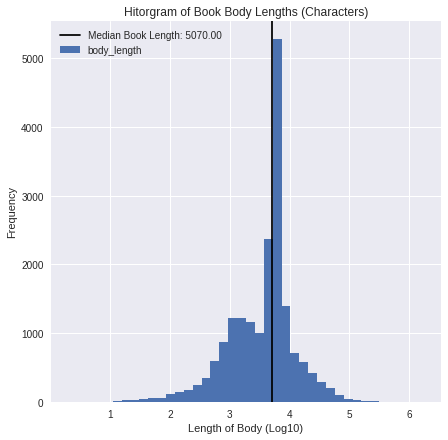

In [5]:
df_fr["body_length"] = df_fr.body_text.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_fr["body_length"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Book Length: {10 ** median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Book Body Lengths (Characters)")
ax.set_xlabel("Length of Body (Log10)")
ax.legend()
plt.show()

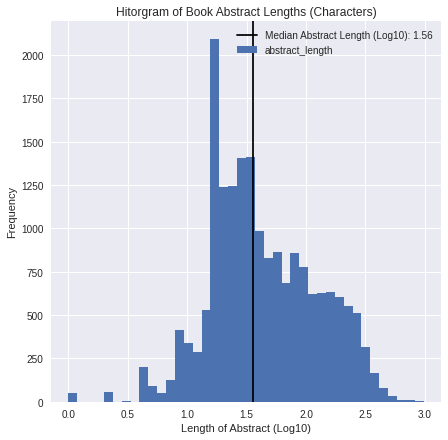

In [6]:
df_fr["abstract_length"] = df_fr.abstract.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_fr["abstract_length"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Abstract Length (Log10): {median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Book Abstract Lengths (Characters)")
ax.set_xlabel("Length of Abstract (Log10)")
ax.legend()
plt.show()

From these basic histograms of body and abstract texts, we can see that mosk book texts are rather short, with a median body length of around
5000 characters (10 ^ 3.71). This in turn corresponds to around 1000 words.

### Text Exploration <a id="text-exploration"></a>

Now we take a quick look at one of the book bodies to get a better idea of what we are dealing with.

[Back to top.](#title)

In [7]:
np.random.seed(987)
sample_df = df_fr.sample(6).reset_index(drop=True)
sample_df

,title,url,abstract,body_text,body_html,body_length,abstract_length
0,Wikilivres : Photographie/Personnalités/C/Benj...,https://fr.wikibooks.org/wiki/Photographie/Per...,== Biographie ==,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4...",5368,16
1,Wikilivres : Mathc complexes/Fichiers c : r0 m,https://fr.wikibooks.org/wiki/Mathc_complexes/...,Catégorie:Mathc complexes (livre),Installer et compiler ces fichiers dans votre ...,"<div class=""mw-parser-output""><p><br>\n</p><p>...",1055,33
2,Wikilivres : Livre de cuisine/Taboulé exotique...,https://fr.wikibooks.org/wiki/Livre_de_cuisine...,Le taboulé exotique aux oranges et aux pruneau...,La cuisine sur WikibooksApprendre à cuisiner •...,"<div class=""mw-parser-output""><div style=""back...",1138,77
3,Wikilivres : Programmation Python/Programmer e...,https://fr.wikibooks.org/wiki/Programmation_Py...,1. Ouvrir Python (command line).,Programmation Python\n\n\nPartie 1 - Introduct...,"<div class=""mw-parser-output""><p><br>\n</p>\n<...",3187,32
4,Wikilivres : Photographie/Personnalités/M/J. M...,https://fr.wikibooks.org/wiki/Photographie/Per...,J. Marchand était un photographe professionnel...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4...",4502,78
5,Wikilivres : Programmation Ruby/Syntaxe,https://fr.wikibooks.org/wiki/Programmation_Ru...,= Syntaxe du langage =,Programmation Ruby\n\n\nIntroduction et instal...,"<div class=""mw-parser-output""><p><br>\n</p>\n<...",13805,22


In [8]:
print(sample_df.loc[1, "body_text"])

Installer et compiler ces fichiers dans votre répertoire de travail.





rdiag.c '

/* ------------------------------------ */
/*  Save as :   rdiag.c                */
/* ------------------------------------ */
#include "w_a.h"
/* ------------------------------------ */
void fun(int rc)
{
double **A   = rdiag_mZ(i_mZ(rc,rc),9);

  clrscrn();

  printf(" rdiag_mZ() :  \n\n" 
         " A[R%d,C%d] : \n",rsize_mZ(A),csize_mZ(A));
         
  p_mZ(A, 5,0, 4,0, C6);
   
  f_mZ(A);
}
/* ------------------------------------ */
int main(void)
{
time_t t;

  srand(time(&t));
  
  do
        fun(rp_I(RC8));

  while(stop_w());       

  return 0;
}


Ici nous travaillons avec la fonction rdiag_mZ(). 
Cette fonction nous permet d'obtenir des matrices diagonales.

Exemple de sortie écran :

  
 rdiag_mZ() :  

 A[R4,C4] : 

   -7  -3i    +0  +0i    +0  +0i    +0  +0i 
   +0  +0i    +2  +2i    +0  +0i    +0  +0i 
   +0  +0i    +0  +0i    +6  -9i    +0  +0i 
   +0  +0i    +0  +0i    +0  +0i    -3 

In [9]:
print(sample_df.loc[2, "body_text"])

La cuisine sur WikibooksApprendre à cuisiner • Régime et gastronomie • Toutes les recettes de cuisine

Le taboulé exotique aux oranges et aux pruneaux est un plat d’accompagnement.

Ingrédients[modifier | modifier le wikicode]
300 g de tomates
200 g de semoule de blé
100 g de poivrons
100 g d’oignons
60 cl de bouillon de légumes
50 g de pruneaux dénoyautés
3 cl de bouillon de basilic
3 cl d’huile d’olive
1 orange
1 botte de menthe
Préparation[modifier | modifier le wikicode]
Porter à ébullition les bouillons et retirer du feu, y verser le zeste haché d’un quart d’orange pour infusion
Tailler en dés les poivrons, la tomate, l’oignon et la moitié d’orange épluchée
Verser le bouillon tiède sur la semoule dans un saladier avec la moitié de la menthe hachée, les pruneaux en morceaux et les légumes. S’assurer que la semoule reste ferme mais pas craquante.
Rafraîchir au réfrigérateur.
Au moment de servir, ajouter l’huile d’olive, le reste de la menthe et le jus d’une demi orange. Vérifier l’a

From this first look we can see that there is a great variety of books within the dataset: from recipes to programming texts, with perhaps
a predominance of the latter. This might prove challenging, since code uses mostly english keywords and as such might not be a good sample
of the language. We could look for ways to filter out these texts, or just see if the model can perform well even if we include them. We might 
also have to deal with the diacritics present.

[Back to top.](#title)

## TED Dataset <a id="ted-dataset"></a>

Now we explore the TED talk transcription dataset.

[Back to top.](#title)

### Data Loading <a id="data-loading-ted"></a>

In [10]:
ted_file = os.path.join("..", "data", "raw-data", "ted-dataset", "ted_talks_fr.csv")
df_ted = pd.read_csv(ted_file)

print(df_ted.shape)

df_ted.head(6)

(3865, 19)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Al Gore explique comment limiter le réchauffem...,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523390,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,Avec le même humour et la même simplicité qu'i...,"Merci beaucoup, Chris. C'est vraiment un honne..."
1,7,"David Pogue dit ""La simplicité vend""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920744,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,Le chroniqueur du New York Times David Pogue p...,"Bonjour répondeur, mon vieil ami. (Rires) J'ap..."
2,53,Le récit du renouveau urbain de Majora Carter,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664104,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"Dans ce témoignage émouvant, Majora Carter, mi...",Si vous êtes là aujourd'hui — et j'en suis trè...
3,66,L'école tue la créativité,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65052139,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson nous expose d'une manière amu...,Bonjour. Comment ça va ? Public : Bien. Tout ç...
4,92,Les meilleures statistiques jamais vues,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501647,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,Vous n'avez jamais vu des données présentées d...,"Il y a 10 ans de cela, j'ai accepté d'enseigne..."
5,86,Julia Sweeney laisse tomber Dieu,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636614,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,"Julia Sweeney (Dieu dit ""Ha!"") présente les 15...","Le 10 septembre, au matin de mon septième anni..."


In [11]:
pd.isnull(df_ted).sum()

talk_id             0
title               0
speaker_1           0
all_speakers        0
occupations       503
about_speakers    491
views               0
recorded_date       0
published_date      0
event               0
native_lang         0
available_lang      0
comments          585
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

From this first view, we can see that the main field we are interested in (the transcripts of the talk) has no null values. Now we
move on to explore properties of the dataset as well as view some texts.

### Exploration <a id="exploration-ted"></a>

[Back to top.](#title)

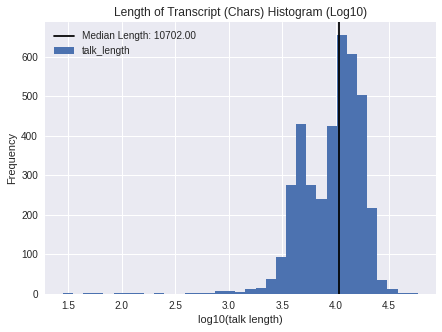

In [12]:
df_ted["talk_length"] = df_ted["transcript"]\
    .map(len)\
    .map(np.log10)

fig, ax = plt.subplots(figsize=(7, 5))

median_len = df_ted["talk_length"].median()
df_ted["talk_length"].plot.hist(ax=ax, bins=35)

ax.axvline(median_len, color="black", label=f"Median Length: {10 ** median_len:.2f}")
ax.legend()

ax.set_title("Length of Transcript (Chars) Histogram (Log10)")
ax.set_xlabel("log10(talk length)")

plt.show()

From this we can see that the median length of the transcripts of TED talks is twice as long as the book bodies from the Wikibooks
dataset. It is also to be expected that the talks will have fewer sections of code or other noise and as such may be a more useful
dataset for our purposes. Now we look at some transcript samples.

In [13]:
np.random.seed(854)
sample_ted = df_ted.sample(6)[[
    "talk_id",
    "title",
    "all_speakers",
    "description",
    "transcript"
]].reset_index(drop=True)

sample_ted

,talk_id,title,all_speakers,description,transcript
0,6477,Comment la réalité augmentée pourrait changer ...,{0: 'Nadine Hachach-Haram'},Si vous subissez une intervention chirurgicale...,Selon les théories du développement social hum...
1,686,Devdutt Pattanaik: L'Orient contre l'Occident ...,{0: 'Devdutt Pattanaik'},Devdutt Pattanaik jette un coup d'oeil révélat...,"Pour comprendre le monde de la mythologie, et ..."
2,941,Dan Cobley : Ce que la physique m'a appris sur...,{0: 'Dan Cobley'},La physique et le marketing ne semblent pas av...,"Je travaille donc dans le marketing, que j'ado..."
3,1566,Ed Gavagan : Une histoire de noeuds et de chir...,{0: 'Ed Gavagan'},"Un jour, Ed Gavagan était assis dans le métro,...","Vous savez, quand on se réveille le matin, on ..."
4,1440,Michael Tilson Thomas : Musique et émotion à t...,{0: 'Michael Tilson Thomas'},"Dans cet aperçu épique, Michael Tilson Thomas ...",Quand on m'a demandé de faire ce discours à TE...
5,74,Alex Steffen imagine un futur durable,{0: 'Alex Steffen'},"Le fondateur de Worldchanging.com, Alex Steffe...",Quand je commence des conférences comme celle-...


In [14]:
print(sample_ted.loc[2, "transcript"][:400])

Je travaille donc dans le marketing, que j'adore, mais ma première passion était la physique, une passion venue à moi grâce à un merveilleux professeur, lorsque j'avais un peu moins de cheveux gris. Il m'a donc appris que la physique, c'est sympa, parce qu'elle nous enseigne tellement sur le monde qui nous entoure. Et je vais passer les prochaines minutes à essayer de vous convaincre que la physiq


At a first glance, this looks like a much more convenient dataset for our model, since there are unlikely to be any code sections
or noise, and we just have long texts in the desired language! We still have to deal with the diacritics in the preprocessing stage,
but this is a good starting point.

[Back to top](#title)